---
jupyter:
  jupytext:
    text_representation:
      extension: .md
      format_name: markdown
      format_version: '1.3'
      jupytext_version: 1.16.4
  kernelspec:
    display_name: Python 3 (ipykernel)
    language: python
    name: python3
---

# Метод наименьших квадратов (Least squares approximation)


**Цель работы:** ознакомление с методом аппроксимации функций.

Продолжительность работы: - 4 часа.

Мягкий дедлайн (10 баллов): 31.10.2024

Жесткий дедлайн (5 баллов): 14.11.2024


## Теоретические сведения


Пусть две величины $x$ и $y$ связаны табличной зависимостью, полученной, например, из опытов.

|$x$ | $x_1$ | $x_2$ | $\cdots$ | $x_n$ |
|:--:|:-----:|:-----:|:--------:|:-----:|
|$y$ | $y_1$ | $y_2$ | $\cdots$ | $y_n$ |

На плоскости $xOy$  данной таблице соответствует $n$  точек $M_i(x_i, y_i)$, где
$ i = 1, 2, 3, \ldots, n$.
Точки $M_i$ называют экспериментальными точками:

![](./img/img01.png)
*Рисунок 1. Экспериментальные точки*

Требуется установить функциональную зависимость $y=f(x)$ между переменными
$x$ и $y$  по результатам экспериментальных исследований, приведенных в таблице.
Применение интерполяции в данном случае нецелесообразно, так как значения
$y_i$ в узлах $x_i$ получены экспериментально и поэтому являются сомнительными
(в ходе эксперимента возникает неустранимая погрешность, обусловленная неточностью измерений).

Кроме того, совпадение значений в узлах не означает совпадения характеров поведения исходной
и интерполирующей функций.
Поэтому необходимо найти такой метод подбора эмпирической формулы, который не только позволяет найти саму формулу,
но и оценить погрешность подгонки.

В общем случае искомая функция $y=f(x)$ будет зависеть не только от $x$, но и от некоторого количества параметров:
$y = f(x, a, b , \ldots)$.


### Постановка задачи

Найти аппроксимирующую функцию
\begin{equation}
    y = f(x, a, b , \ldots)
    \label{eq:01} 
    \tag{1}
\end{equation}
такую, чтобы в точках $x=x_i$ она принимала значения по возможности близкие к табличным, 
то есть график искомой функции должен проходить как можно ближе к экспериментальным точкам.
Вид функции \eqref{eq:01} может быть известен из теоретических соображений или определяться 
характером расположения экспериментальных точек $M_i$ на плоскости $xOy$.

Для отыскания коэффициентов $a, b, \ldots$ в функции \eqref{eq:01}
применяется метод наименьших квадратов (МНК), который состоит в следующем. 
Между искомой функцией и табличными значениями в точках $x_i$ наблюдаются отклонения.
Обозначим их
$\Delta y_i = f(x_i, a, b, \ldots) - y_i$, где $i = 1, 2, \ldots, n$.
Выбираем значения коэффициентов $a, b, \ldots$ так, чтобы сумма квадратов отклонений
принимала минимальное значение:
\begin{equation}
    L(a, b, \ldots) =
    \sum\limits_{i=1}^n {\left( \Delta y_i\right)^2} = 
    \sum\limits_{i=1}^n {\left( f(x_i, a, b, \ldots) - y_i \right)^2} \rightarrow \min.
    \label{eq:02} 
    \tag{2}
\end{equation}

Сумма $L(a, b, \ldots)$ является функцией нескольких переменных.
Необходимый признак экстремума функции нескольких переменных
состоит в том, что обращаются в нуль частные производные:
\begin{equation}
    L_a^\prime(a, b, \ldots) = 0, \; 
    L_b^\prime(a, b, \ldots) = 0, \;
    \ldots
    \label{eq:03} 
    \tag{3}
\end{equation}



### План решения задачи

1. Выбираем вид функции $y = f(x, a, b , \ldots)$.

2. Для отыскания коэффициентов $a, b, \ldots$ составляем систему уравнений  \eqref{eq:03}.

3. Решая систему уравнений  \eqref{eq:03}, находим значения коэффициентов $a, b, \ldots$.

4. Подставляя $a, b, \ldots$ в уравнение \eqref{eq:01}, получаем искомую функцию $y = f(x, a, b , \ldots)$.

5. По достаточному признаку экстремума функции нескольких переменных следует убедиться в постоянстве знака дифференциала
второго порядка этой функции: $d^2 L > 0$: при любых приращениях аргументов $da$, $db$, \ldots.
Такая проверка делается в теоретической части метода наименьших квадратов и на практике не повторяется.

6. Обычно рассматривают несколько видов функций $y = f(x, a, b , \ldots)$ и выбирают ту функцию, для которой суммарная
погрешность (функций потерь)
$\sum\limits_{i=1}^n {\left( f(x_i, a, b, \ldots) - y_i \right)^2}$
окажется наименьшей.



Рассмотрим несколько случаев подбора аппроксимирующей функции $y = f(x, a, b , \ldots)$.


### Линейная функция

\begin{equation}
    y = ax + b.
    \label{eq:04} 
    \tag{4}
\end{equation}

#### Решение

Составим функцию потерь, как функцию двух переменных, и найдем, при каких значениях $a$, $b$ эта функция принимает минимальное значение:

\begin{equation}
    L(a, b) = 
    \sum\limits_{i=1}^n {\left( ax_i + b- y_i \right)^2} \rightarrow \min.
    \label{eq:05} 
    \tag{5}
\end{equation}

По необходимому признаку экстремума частные производные функции \eqref{eq:05} должны быть равны нулю:

\begin{equation}
    \begin{cases}
        L_a^\prime(a, b) = \sum\limits_{i=1}^{n} {2(ax_i+b-y_i)\cdot x_i} = 0,\\
        L_b^\prime(a, b) = \sum\limits_{i=1}^{n} {2(ax_i+b-y_i)\cdot 1} = 0.
    \end{cases}
    \label{eq:06} 
    \tag{6}
\end{equation}

Преобразуем уравнения системы \eqref{eq:06} следующим образом:

\begin{equation}
    \begin{cases}
        \left( \sum\limits_{i=1}^{n} {x_i^2} \right) \cdot a + 
        \left( \sum\limits_{i=1}^{n} {x_i} \right) \cdot b =
        \sum\limits_{i=1}^{n} {(x_i \cdot y_i)}
        \\
        \left( \sum\limits_{i=1}^{n} {x_i} \right) \cdot a + 
        n\cdot b =
        \sum\limits_{i=1}^{n} {y_i}.
    \end{cases}
    \label{eq:07} 
    \tag{7}
\end{equation}

Таким образом, получается система линейных уравнений с двумя неизвестными $a$ и $b$. 
Коэффициенты при неизвестных $a$ и $b$ (соответствующие суммы) находятся из исходной
табличной зависимости и являются постоянными для данной выборки. 
При различных значениях $x_i$ главный определитель этой системы отличен от нуля:

\begin{equation}
    \Delta =
    \begin{vmatrix}
        \sum\limits_{i=1}^{n} {x_i^2} &  \sum\limits_{i=1}^{n} {x_i}  \\
         \sum\limits_{i=1}^{n} {x_i} & n
    \end{vmatrix}
    =
    n \cdot \sum\limits_{i=1}^{n} {x_i^2} - \left( \sum\limits_{i=1}^{n} {x_i} \right)^2   
    =
    \sum\limits_{i=1}^{n} {\sum\limits_{j=1}^{n} {(x_i - x_j)^2}} 
    \neq 0.
\end{equation}

Следовательно, система линейных уравнений \eqref{eq:07} имеет единственное решение, которое находится по формулам Крамера:

\begin{equation}
    a = \cfrac{\Delta_a}{\Delta} = 
    \cfrac
        {
             n \cdot \sum\limits_{i=1}^{n} {(x_i \cdot y_i)} 
             - 
             \sum\limits_{i=1}^{n} {x_i} \cdot \sum\limits_{i=1}^{n} {y_i}
        }
        {
            n \cdot \sum\limits_{i=1}^{n} {(x_i)^2} 
            - 
            \left( \sum\limits_{i=1}^{n} {x_i} \right)^2} .
\end{equation}

\begin{equation}
    b = \cfrac{\Delta_b}{\Delta} = 
    \cfrac{1}{n} \cdot \sum\limits_{i=1}^{n} {y_i} 
    -
    a \cdot \cfrac{1}{n} \cdot \sum\limits_{i=1}^{n} {x_i}.
\end{equation}

Подставим найденные значения $a$ и $b$ в уравнение \eqref{eq:04}, и получим искомую линейную функцию $y =ax+b$.

Убедимся, что в стационарной точке $M_0(a, b) функция $L(a, b)$ принимает минимальное значение.

Достаточным условием того, что функция двух переменных принимает минимальное значение, является постоянство знака
второго дифференциала этой функции: $d^2 L(a, b) > 0$ при любых приращениях аргументов $da$, $db$.

Дифференциал второго порядка функции  $L(a, b)$ имеет вид:

\begin{equation}
    d^2 L(a, b) =
    L_{aa}^{\prime\prime}(a, b) \cdot da^2 + 2 L_{ab}^{\prime\prime}(a, b) \cdot da db + L_{bb}^{\prime\prime}(a, b) \cdot db^2 =
    \left( 2  \sum\limits_{i=1}^{n} {x_i^2} \right) da^2 + 
        2 \left( 2  \sum\limits_{i=1}^{n} {x_i} \right) da db + (2n)db^2.
\end{equation}

Второй дифференциал является квадратичной формой второго порядка от переменных $da$ и $db$. 
Квадратичная форма принимает только положительные значения при
$da \neq 0$ и $db \neq 0$, если соответствующая ей матрица положительно определена.
Матрица квадратичной формы дифференциала второго порядка (матрица Гессе) будет иметь вид:

\begin{equation}
    H = 
    \begin{bmatrix}
        L_{aa}^{\prime\prime}(a, b) & L_{ab}^{\prime\prime}(a, b) \\ 
        L_{ab}^{\prime\prime}(a, b) & L_{bb}^{\prime\prime}(a, b) 
    \end{bmatrix}
    =
    \begin{bmatrix}
        2 \sum\limits_{i=1}^{n} {x_i^2}  & 2 \sum\limits_{i=1}^{n} {x_i} \\ 
        2 \sum\limits_{i=1}^{n} {x_i}    &  2n
    \end{bmatrix}.
\end{equation}

Найдем ее главные миноры:

\begin{equation}
    M_1 = L_{aa}^{\prime\prime}(a, b) = 2 \sum\limits_{i=1}^{n} {x_i^2} > 0,
\end{equation}

\begin{equation}
    M_2 = 
    \begin{vmatrix}
        L_{aa}^{\prime\prime}(a, b) & L_{ab}^{\prime\prime}(a, b) \\ 
        L_{ab}^{\prime\prime}(a, b) & L_{bb}^{\prime\prime}(a, b) 
    \end{vmatrix}
    =
    \begin{vmatrix}
        2 \sum\limits_{i=1}^{n} {x_i^2}  & 2 \sum\limits_{i=1}^{n} {x_i} \\ 
        2 \sum\limits_{i=1}^{n} {x_i}    &  2n
    \end{vmatrix}
    =
    4n \cdot \sum\limits_{i=1}^{n} {x_i^2} - 
        4 \cdot \left( \sum\limits_{i=1}^{n} {x_i}  \right)^2
    =
    2\cdot \sum\limits_{i=1}^{n} {\sum\limits_{j=1}^{n} {(x_i - x_j)^2}} > 0.
\end{equation}

Так как главные миноры матрицы Гессе положительны, то по критерию Сильвестра матрица положительно определена,
и квадратичная форма дифференциала $d^2 L(a, b)$, соответствующая этой матрице, принимает только положительные значения. 
Из условия $d^2 L(a, b) > 0$ следует, что $M_0(a, b) – точка минимума функции $L(a, b)$. 
Итак, коэффициенты $a$ и $b$, найденные с помощью метода наименьших квадратов, всегда определяют именно минимум функции
$L(a, b)$ . 
Более того, так как функция $L(a, b)$ имеет единственную стационарную точку $M_0(a, b), минимум функции является наименьшим 
значением $L(a, b)$.

Если коэффициенты  линейной функции найдены, можно вычислить суммарную погрешность:

\begin{equation}
    L(a, b) = 
    \sum\limits_{i=1}^{n} 
        {
            \left((ax_i+b)-y_i\right)^2
        }.
\end{equation}

Метод наименьших квадратов для линейной функции широко применяется при обработке данных не только в теории измерений, но
и в математической статистике и машинном обучении при нахождении статистических оценок параметров и построении уравнения линейной регрессии, в эконометрике при нахождении трендов, а также в других прикладных дисциплиях.


### Степенная функция

\begin{equation}
    y = \beta \cdot x^a.
    \label{eq:08} 
    \tag{8}
\end{equation}

#### Решение

Прологарифмируем по основанию $е$ функцию \eqref{eq:08} и получим новое уравнение:

\begin{equation}
    \ln{y} = a\cdot \ln{x} + \ln{\beta}.
    \label{eq:09} 
    \tag{9}
\end{equation}

Обозначим
$Y = \ln{y}$, $X = \ln{x}$, $b = \ln{\beta}$.

Тогда равенство \eqref{eq:09} примет вид $Y = a \cdot X + b$, где переменные $X$
и $Y$ связаны следующей табличной зависимостью:

| $X = \ln{x}$ | $X_1 = \ln{x_1}$ | $X_2 = \ln{x_2}$ | $\cdots$ | $X_n = \ln{x_n}$ |
|:------------:|:----------------:|:----------------:|:--------:|:----------------:|
| $Y = \ln{y}$ | $Y_1 = \ln{y_1}$ | $Y_2 = \ln{y_2}$ | $\cdots$ | $Y_n = \ln{y_n}$ |

Таким образом, задача свелась к рассмотренной выше задаче нахожднеия коэффициэнтов линейной функции. 

Решая эту задачу, находим значения коэффициентов $a$ и $b$. 

Учитывая, что $b = \ln{\beta}$, находим $\beta = e^b$.

Подставим найденные значения $a$ и $\beta$ в уравнение \eqref{eq:08} и получим искомую степенную функцию $y = \beta \cdot x^a$.

Суммарная погрешность равна
\begin{equation}
    L(a, b) = 
    \sum\limits_{i=1}^{n} 
        {
            \left(\beta \cdot x_i^a-y_i\right)^2
        }.
\end{equation}


### Показательная функция

\begin{equation}
    y = \beta \cdot e^{ax}.
    \label{eq:10} 
    \tag{10}
\end{equation}

#### Решение

Прологарифмируем по основанию $е$ функцию \eqref{eq:09} и получим новое уравнение:

\begin{equation}
    \ln{y} = a\cdot x + \ln{\beta}.
    \label{eq:11} 
    \tag{11}
\end{equation}

Обозначим
$Y = \ln{y}$, $b = \ln{\beta}$.

Тогда равенство \eqref{eq:11} примет вид $Y = a \cdot X + b$, где переменные $X$
и $Y$ связаны следующей табличной зависимостью:

| $x$          | $x_1$            | $x_2$            | $\cdots$ | $x_n$ |
|:------------:|:----------------:|:----------------:|:--------:|:----------------:|
| $Y = \ln{y}$ | $Y_1 = \ln{y_1}$ | $Y_2 = \ln{y_2}$ | $\cdots$ | $Y_n = \ln{y_n}$ |

Таким образом, задача свелась к рассмотренной выше задаче нахожднеия коэффициэнтов линейной функции. 

Решая эту задачу, находим значения коэффициентов $a$ и $b$. 

Учитывая, что $b = \ln{\beta}$, находим $\beta = e^b$.

Подставим найденные значения $a$ и $\beta$ в уравнение \eqref{eq:10} и получим искомую степенную функцию $y = \beta \cdot e^{ax}$.

Суммарная погрешность равна
\begin{equation}
    L(a, b) = 
    \sum\limits_{i=1}^{n} 
        {
            \left(\beta \cdot e^{ax_i}-y_i\right)^2
        }.
\end{equation}


### Квадратичная функция

\begin{equation}
    y = ax^2 + bx + c.
    \label{eq:12} 
    \tag{12}
\end{equation}

#### Решение

Составим функцию трех переменных и найдем, при каких значениях $a$, $b$, $c$ эта функция принимает минимальное значение:

\begin{equation}
    L(a, b, c) = 
    \sum\limits_{i=1}^n {\left( ax_i^2 + bx + c - y_i \right)^2} \rightarrow \min.
    \label{eq:13} 
    \tag{13}
\end{equation}

Функция $L(a, b, c)$ будет принимать минимальное значение, если частные  производные
$L_a^\prime(a, b, c)$, $L_b^\prime(a, b, c)$, $L_b^\prime(a, b, c)$ обращаются в нуль:

\begin{equation}
    \begin{cases}
        L_a^\prime(a,b,c) = \sum\limits_{i=1}^{n} {2(ax_i^2+bx_i + c - y_i)\cdot x_i^2} = 0,\\
        L_b^\prime(a,b,c) = \sum\limits_{i=1}^{n} {2(ax_i^2+bx_i + c - y_i)\cdot x_i} = 0,\\
        L_c^\prime(a,b,c) = \sum\limits_{i=1}^{n} {2(ax_i^2+bx_i + c - y_i)\cdot 1} = 0.\\
    \end{cases}
    \label{eq:14} 
    \tag{14}
\end{equation}

Преобразуем уравнения системы \eqref{eq:14} следующим образом:

\begin{equation}
    \begin{cases}
        \left( \sum\limits_{i=1}^{n} {x_i^4} \right) \cdot a + 
            \left( \sum\limits_{i=1}^{n} {x_i^3} \right) \cdot b +
                \left( \sum\limits_{i=1}^{n} {x_i^2} \right) \cdot c =
        \sum\limits_{i=1}^{n} {(x_i^2 \cdot y_i)}
        \\
        \left( \sum\limits_{i=1}^{n} {x_i^3} \right) \cdot a + 
            \left( \sum\limits_{i=1}^{n} {x_i^2} \right) \cdot b +
                \left( \sum\limits_{i=1}^{n} {x_i} \right) \cdot c =
        \sum\limits_{i=1}^{n} {(x_i \cdot y_i)}
        \\
        \left( \sum\limits_{i=1}^{n} {x_i^2} \right) \cdot a + 
            \left( \sum\limits_{i=1}^{n} {x_i} \right) \cdot b +
                n \cdot c =
        \sum\limits_{i=1}^{n} {y_i}.
    \end{cases}
    \label{eq:15} 
    \tag{15}
\end{equation}

Получили систему трех линейных уравнений с тремя неизвестными $a$, $b$, $c$. 
Аналогично случаю двух переменных, эта система имеет единственное решение. 
Кроме того, можно доказать, что коэффициенты, найденные с помощью метода наименьших
квадратов, всегда определяют именно минимум функции $L(a, b, c)$.

Решая систему уравнений, найдем значения коэффициентов $a$, $b$, $c$. 
Подставим найденные значения $a$, $b$, $c$ в уравнение \eqref{eq:12}, и получим искомую квадратичную функцию 
$y = ax^2 + bx + c$.

Суммарная погрешность равна
\begin{equation}
    L(a, b) = 
    \sum\limits_{i=1}^{n} 
        {
            \left(a x_i^2 + bx_i + c - y_i\right)^2
        }.
\end{equation}

<!-- #region -->
## Задание

Дана таблица значений некоторой функциональной зависимости, полученной из $n = 6$ опытов

1. Методом наименьших квадратов по данной табличной зависимости найти аппроксимирующую функцию в виде:

  1.1) линейной функции $y = ax + b$;

  1.2) степенной функции $y = \beta \cdot x^a$;

  1.3) показательной функции $y = \beta \cdot e^{ax}$;

  1.4) квадратичной функции $y = ax^2 + bx + c$.

2. Построить в плоскости $xOy$ графики полученных функций и нанести экспериментальные точки.

3. Сравнить полученные результаты.


Промежуточные вычисления вести с точностью до 0,0001.

Значения параметров $a$, $b$, $c$ округлить до 0,01.
<!-- #endregion -->

<!-- #region -->
### Варианты индивидуальных заданий
Вариант 21  

|$x$ | 21 | 32 | 43 | 54 | 65 | 76 | 
|:--:|:---:|:---:|:---:|:---:|:---:|:---:|
|$y$ | 5,4 | 6,3 | 7,1 | 7,6 | 8,1 | 8,5 | 


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Данные варианта 21
x = np.array([21, 32, 43, 54, 65, 76], dtype=float)
y = np.array([5.4, 6.3, 7.1, 7.6, 8.1, 8.5], dtype=float)
n = len(x)

### 1.1) Линейная функция $y = ax + b$

In [2]:
# Расчет коэффициентов a и b по формулам МНК
sum_x = np.sum(x)
sum_y = np.sum(y)
sum_x2 = np.sum(x**2)
sum_xy = np.sum(x * y)

Delta = n * sum_x2 - sum_x**2
Delta_a = n * sum_xy - sum_x * sum_y
Delta_b = sum_x2 * sum_y - sum_x * sum_xy

a_lin = Delta_a / Delta
b_lin = Delta_b / Delta

# Округление до двух знаков
a_lin_rounded = np.round(a_lin, 2)
b_lin_rounded = np.round(b_lin, 2)

a_lin_rounded, b_lin_rounded

(np.float64(0.06), np.float64(4.47))

In [3]:
# Вычисляем предсказанные значения и суммарную погрешность
y_lin = a_lin_rounded * x + b_lin_rounded
L_lin = np.sum((y_lin - y)**2)

L_lin_round = np.round(L_lin, 4)
L_lin_round

np.float64(0.4854)

### 1.2) Степенная функция $y = \beta \cdot x^a$

In [4]:
# Преобразуем данные в логарифмы
X_log = np.log(x)
Y_log = np.log(y)

# Решаем линейную регрессию Y_log = a * X_log + b_log
sum_X = np.sum(X_log)
sum_Y = np.sum(Y_log)
sum_X2 = np.sum(X_log**2)
sum_XY = np.sum(X_log * Y_log)

Delta_p = n * sum_X2 - sum_X**2
Delta_a_p = n * sum_XY - sum_X * sum_Y
Delta_b_p = sum_X2 * sum_Y - sum_X * sum_XY

a_pow = Delta_a_p / Delta_p
b_log = Delta_b_p / Delta_p
beta_pow = np.exp(b_log)

# Округление до двух знаков
a_pow_rounded = np.round(a_pow, 2)
beta_pow_rounded = np.round(beta_pow, 2)

a_pow_rounded, beta_pow_rounded

(np.float64(0.35), np.float64(1.85))

In [5]:
# Вычисляем предсказанные значения и суммарную погрешность
y_pow = beta_pow_rounded * x**a_pow_rounded
L_pow = np.sum((y_pow - y)**2)

L_pow_round = np.round(L_pow, 4)
L_pow_round

np.float64(0.0845)

### 1.3) Показательная функция $y = \beta \cdot e^{ax}$

In [6]:
# Преобразуем данные в логарифмы
Y_log_exp = np.log(y)

# Решаем линейную регрессию Y_log_exp = a * x + b_log_exp
sum_x_exp = np.sum(x)
sum_Y_exp = np.sum(Y_log_exp)
sum_x2_exp = np.sum(x**2)
sum_xY_exp = np.sum(x * Y_log_exp)

Delta_e = n * sum_x2_exp - sum_x_exp**2
Delta_a_e = n * sum_xY_exp - sum_x_exp * sum_Y_exp
Delta_b_e = sum_x2_exp * sum_Y_exp - sum_x_exp * sum_xY_exp

a_exp = Delta_a_e / Delta_e
b_log_exp = Delta_b_e / Delta_e
beta_exp = np.exp(b_log_exp)

# Округление до двух знаков
a_exp_rounded = np.round(a_exp, 2)
beta_exp_rounded = np.round(beta_exp, 2)

a_exp_rounded, beta_exp_rounded

(np.float64(0.01), np.float64(4.8))

In [7]:
# Вычисляем предсказанные значения и суммарную погрешность
y_exp = beta_exp_rounded * np.exp(a_exp_rounded * x)
L_exp = np.sum((y_exp - y)**2)

L_exp_round = np.round(L_exp, 4)
L_exp_round

np.float64(5.1605)

### 1.4) Квадратичная функция $y = ax^2 + bx + c$

In [8]:
# Составляем матрицу системы нормальных уравнений
X_mat = np.vstack([x**2, x, np.ones(n)]).T
coeffs_quad = np.linalg.lstsq(X_mat, y, rcond=None)[0]
a_quad, b_quad, c_quad = coeffs_quad

# Округление до двух знаков
a_quad_rounded = np.round(a_quad, 2)
b_quad_rounded = np.round(b_quad, 2)
c_quad_rounded = np.round(c_quad, 2)

a_quad_rounded, b_quad_rounded, c_quad_rounded

(np.float64(-0.0), np.float64(0.11), np.float64(3.38))

In [9]:
# Вычисляем предсказанные значения и суммарную погрешность
y_quad = a_quad_rounded * x**2 + b_quad_rounded * x + c_quad_rounded
L_quad = np.sum((y_quad - y)**2)

L_quad_round = np.round(L_quad, 4)
L_quad_round

np.float64(20.8251)

### 2) Построение графиков аппроксимирующих функций и экспериментальных точек

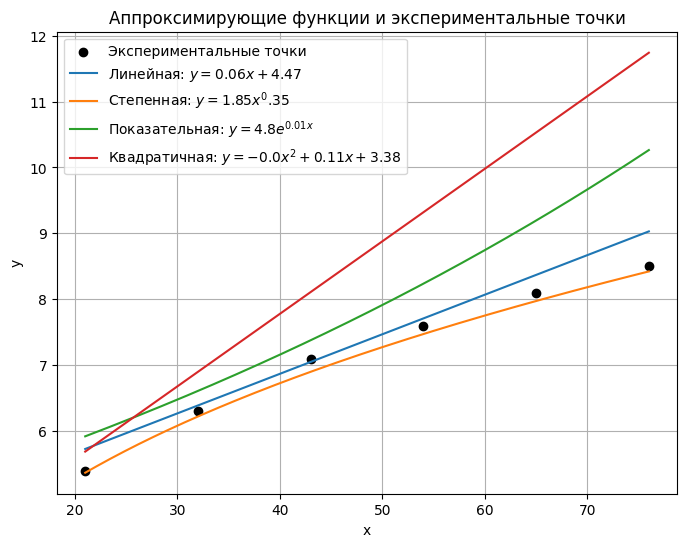

In [10]:
# Диапазон для построения графиков
x_plot = np.linspace(min(x), max(x), 200)

# Вычисляем значения функций на диапазоне
y_lin_plot = a_lin_rounded * x_plot + b_lin_rounded
y_pow_plot = beta_pow_rounded * x_plot**a_pow_rounded
y_exp_plot = beta_exp_rounded * np.exp(a_exp_rounded * x_plot)
y_quad_plot = a_quad_rounded * x_plot**2 + b_quad_rounded * x_plot + c_quad_rounded

plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='black', label='Экспериментальные точки')

plt.plot(x_plot, y_lin_plot, label=f'Линейная: $y={a_lin_rounded}x+{b_lin_rounded}$')
plt.plot(x_plot, y_pow_plot, label=f'Степенная: $y={beta_pow_rounded}x^{a_pow_rounded}$')
plt.plot(x_plot, y_exp_plot, label=f'Показательная: $y={beta_exp_rounded} e^{{{a_exp_rounded}x}}$')
plt.plot(x_plot, y_quad_plot, label=f'Квадратичная: $y={a_quad_rounded}x^2+{b_quad_rounded}x+{c_quad_rounded}$')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Аппроксимирующие функции и экспериментальные точки')
plt.legend()
plt.grid(True)
plt.show()

### 3) Сравнение результатов (суммарные погрешности)

- $L_{\text{Линейная}} = ${L_lin_round}  
- $L_{\text{Степенная}} = ${L_pow_round}  
- $L_{\text{Показательная}} = ${L_exp_round}  
- $L_{\text{Квадратичная}} = ${L_quad_round  

Из полученных значений суммарных погрешностей можно сделать вывод, что лучшей аппроксимирующей функцией является та, у которой значение $L$ минимально.


### Вывод

Наименьшая погрешность соответствует квадратичной функции $y = {a_quad_rounded}x^2 + {b_quad_rounded}x + {c_quad_rounded}$, следовательно, она является лучшей аппроксимацией для данного набора данных.
